# Model Training [ Result 3 ] -- Part 3  
# Target variable --> Average score
## with Top 10 features 
### 1.1 Import Data and Required Packages  
Importing Pandas, Numpy, Matplotlib, Seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score


### Preparing X and Y variables

In [6]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')

Y_train = pd.read_csv('Y_train.csv').squeeze()
Y_test = pd.read_csv('Y_test.csv').squeeze()

X=X_train
Y=Y_train

In [7]:
X.columns

Index(['math_score', 'test_preparation_course_completed',
       'test_preparation_course_none', 'lunch_free/reduced', 'gender_female',
       'lunch_standard', 'parental_level_of_education_high school',
       'race_ethnicity_group D', 'race_ethnicity_group B', 'gender_male'],
      dtype='object')

In [8]:
X_train

,math_score,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,gender_female,lunch_standard,parental_level_of_education_high school,race_ethnicity_group D,race_ethnicity_group B,gender_male
0,62,0,1,0,1,1,0,1,0,0
1,66,1,0,1,1,0,0,0,0,0
2,79,0,1,1,1,0,0,1,0,0
3,61,0,1,1,0,0,0,0,0,1
4,73,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
795,87,0,1,0,1,1,0,1,0,0
796,69,0,1,0,0,1,0,0,0,1
797,53,0,1,0,1,1,0,0,0,0
798,50,1,0,1,0,0,0,0,0,1


In [9]:
Y_test

0      87.0
1      64.0
2      75.0
3      75.0
4      82.0
       ... 
195    55.0
196    57.0
197    77.0
198    72.0
199    69.0
Name: average, Length: 200, dtype: float64

In [10]:
type(Y)

pandas.core.series.Series

In [11]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

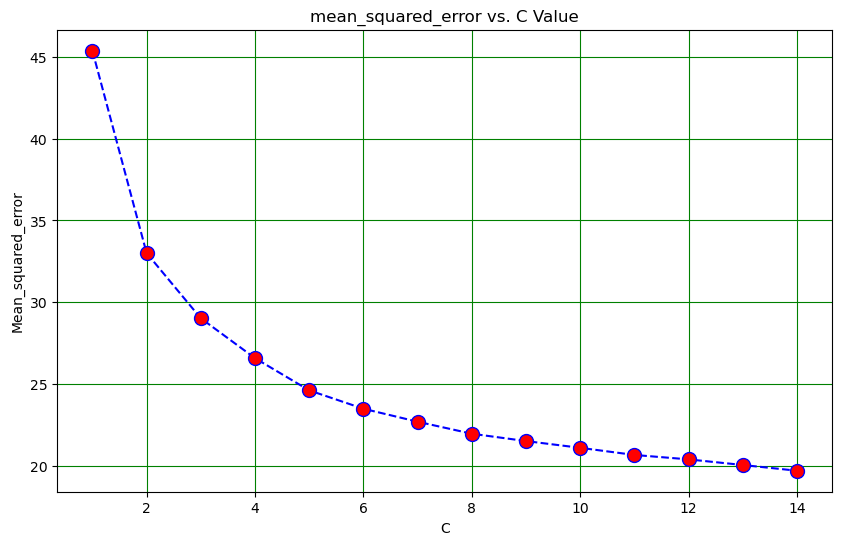

In [63]:
acc = []
# Will take some time for first finding the optimal value of C
from sklearn import metrics
for i in range(1,15):
    svr = SVR(kernel='rbf', C=i, epsilon=0.1).fit(X_train,Y_train)
    svr_pdt=svr.predict(X_test)
    acc.append(metrics.mean_squared_error(Y_test, svr_pdt))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('mean_squared_error vs. C Value')
plt.xlabel('C')
plt.ylabel('Mean_squared_error')
plt.grid(True,color='g')

In [69]:

svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train,Y_train)

SVR(C=10)

In [70]:
Y_pred = svr.predict(X_test)
#Y_pred

In [71]:
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 21.10852726513705


In [72]:
nqrt = np.sqrt(mean_squared_error(Y_test, Y_pred))
#("root mean squared value:",nqrt)
nqrt

4.594401730926133

In [73]:
r2 = r2_score(Y_test,Y_pred)
print("R2 Score:", r2*100)

R2 Score: 90.17146438047465
